<a href="https://colab.research.google.com/github/mohdaim996/Australia_Rains_Logistic_Regression/blob/main/Rain_in_Aus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np  

In [2]:
df = pd.read_csv('/content/weatherAUS.csv')

In [3]:
df

Date  Location  MinTemp  ...  Temp3pm  RainToday  RainTomorrow
0      2008-12-01    Albury     13.4  ...     21.8         No            No
1      2008-12-02    Albury      7.4  ...     24.3         No            No
2      2008-12-03    Albury     12.9  ...     23.2         No            No
3      2008-12-04    Albury      9.2  ...     26.5         No            No
4      2008-12-05    Albury     17.5  ...     29.7         No            No
...           ...       ...      ...  ...      ...        ...           ...
86872  2016-08-02  Brisbane     12.6  ...     22.3         No           Yes
86873  2016-08-03  Brisbane     13.8  ...     17.4        Yes            No
86874  2016-08-04  Brisbane     11.7  ...     18.8         No            No
86875  2016-08-05  Brisbane     11.6  ...     20.4         No            No
86876  2016-08-06  Brisbane     10.9  ...     22.0         No            No

[86877 rows x 23 columns]

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86877 entries, 0 to 86876
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           86877 non-null  object 
 1   Location       86877 non-null  object 
 2   MinTemp        85681 non-null  float64
 3   MaxTemp        85865 non-null  float64
 4   Rainfall       84535 non-null  float64
 5   Evaporation    47217 non-null  float64
 6   Sunshine       40297 non-null  float64
 7   WindGustDir    80596 non-null  object 
 8   WindGustSpeed  80604 non-null  float64
 9   WindDir9am     79092 non-null  object 
 10  WindDir3pm     83907 non-null  object 
 11  WindSpeed9am   85429 non-null  float64
 12  WindSpeed3pm   84810 non-null  float64
 13  Humidity9am    84811 non-null  float64
 14  Humidity3pm    84390 non-null  float64
 15  Pressure9am    76221 non-null  float64
 16  Pressure3pm    76268 non-null  float64
 17  Cloud9am       53399 non-null  float64
 18  Cloud3

In [8]:
df.describe()

MinTemp       MaxTemp  ...       Temp9am       Temp3pm
count  85681.000000  85865.000000  ...  85314.000000  84837.000000
mean      11.269229     22.165109  ...     15.764002     20.700123
std        6.117585      6.887668  ...      6.045652      6.695385
min       -8.500000     -4.800000  ...     -7.200000     -5.400000
25%        6.900000     17.300000  ...     11.400000     16.000000
50%       11.300000     21.700000  ...     15.800000     20.300000
75%       16.000000     26.600000  ...     20.200000     25.000000
max       31.900000     47.300000  ...     37.700000     46.700000

[8 rows x 16 columns]

In [10]:
df.isna().sum()

Date                 0
Location             0
MinTemp           1196
MaxTemp           1012
Rainfall          2342
Evaporation      39660
Sunshine         46580
WindGustDir       6281
WindGustSpeed     6273
WindDir9am        7785
WindDir3pm        2970
WindSpeed9am      1448
WindSpeed3pm      2067
Humidity9am       2066
Humidity3pm       2487
Pressure9am      10656
Pressure3pm      10609
Cloud9am         33478
Cloud3pm         34502
Temp9am           1563
Temp3pm           2040
RainToday         2342
RainTomorrow      2340
dtype: int64

In [6]:
df.Location.unique()

array(['Albury', 'BadgerysCreek', 'Cobar', 'CoffsHarbour', 'Moree',
       'Newcastle', 'NorahHead', 'NorfolkIsland', 'Penrith', 'Richmond',
       'Sydney', 'SydneyAirport', 'WaggaWagga', 'Williamtown',
       'Wollongong', 'Canberra', 'Tuggeranong', 'MountGinini', 'Ballarat',
       'Bendigo', 'Sale', 'MelbourneAirport', 'Melbourne', 'Mildura',
       'Nhil', 'Portland', 'Watsonia', 'Dartmoor', 'Brisbane'],
      dtype=object)

In [91]:
df.Rainfall

0        0.6
1        0.0
2        0.0
3        0.0
4        1.0
        ... 
86872    0.0
86873    8.6
86874    0.8
86875    0.2
86876    0.0
Name: Rainfall, Length: 86877, dtype: float64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


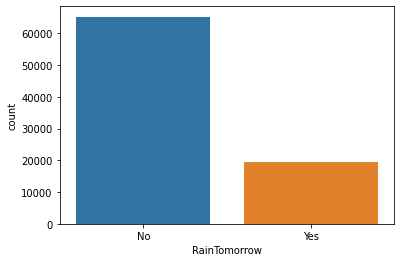

In [11]:
sns.countplot(df['RainTomorrow'])

In [ ]:
df.Date = pd.to_datetime(df.Date)
df['Day'] = df.Date.dt.day
df['Month'] = df.Date.dt.month
df['Year'] = df.Date.dt.year
df.drop('Date',axis=1,inplace=True)
df[['Day','Month','Year']]

In [56]:
by_month = df.head(5000).groupby(['Month'])['RainTomorrow'].apply(list).reset_index().copy()
ex = pd.get_dummies(by_month['RainTomorrow'].explode())
res = pd.concat([by_month, ex.groupby(level=0).sum()], axis=1).drop('RainTomorrow', axis=1)
res.sort_values(by = 'Yes', ascending = False)

Month     No    Yes
5       6  326.0  111.0
6       7  328.0  105.0
7       8  315.0   90.0
10     11  301.0   87.0
2       3  374.0   81.0
3       4  307.0   81.0
1       2  277.0   79.0
4       5  372.0   78.0
0       1  384.0   76.0
11     12  298.0   71.0
9      10  325.0   70.0
8       9  314.0   67.0

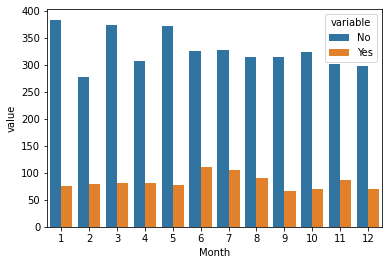

In [76]:
sns.barplot(data=pd.melt(res,'Month'), x= 'Month', y='value', hue='variable')

In [77]:
num_col = df._get_numeric_data().columns
num_col

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'Day', 'Year', 'Month'],
      dtype='object')

In [79]:
cat_col=list(set(df)-set(num_col))
cat_col

['WindGustDir',
 'WindDir3pm',
 'Location',
 'RainTomorrow',
 'WindDir9am',
 'RainToday']

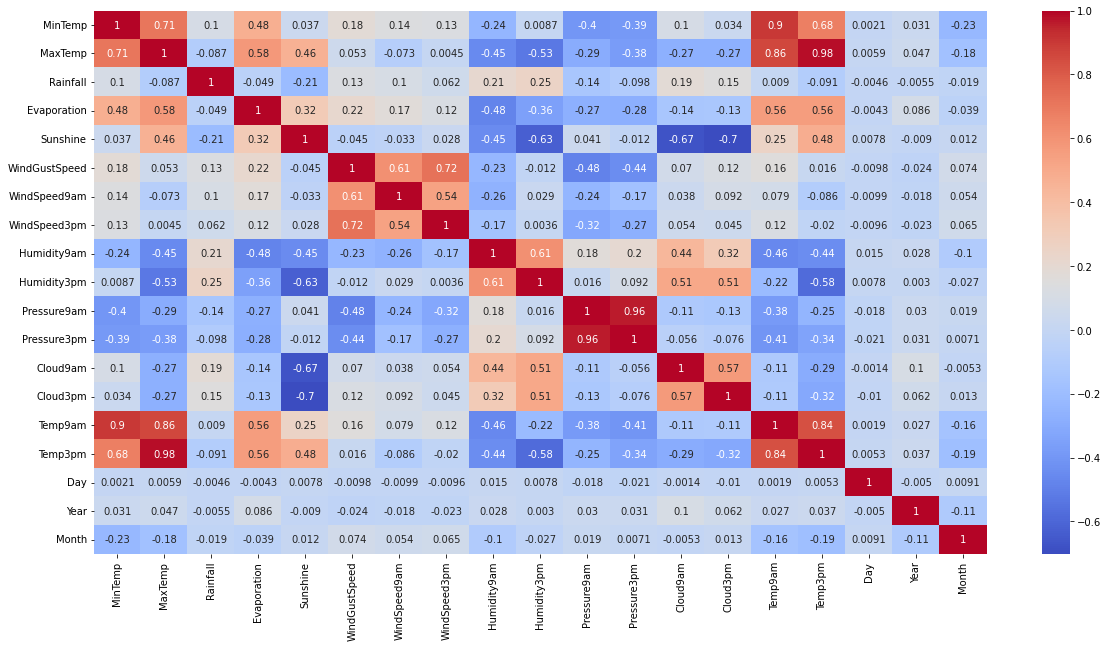

In [88]:
plt.figure(figsize=(20,10))
heatmap=sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

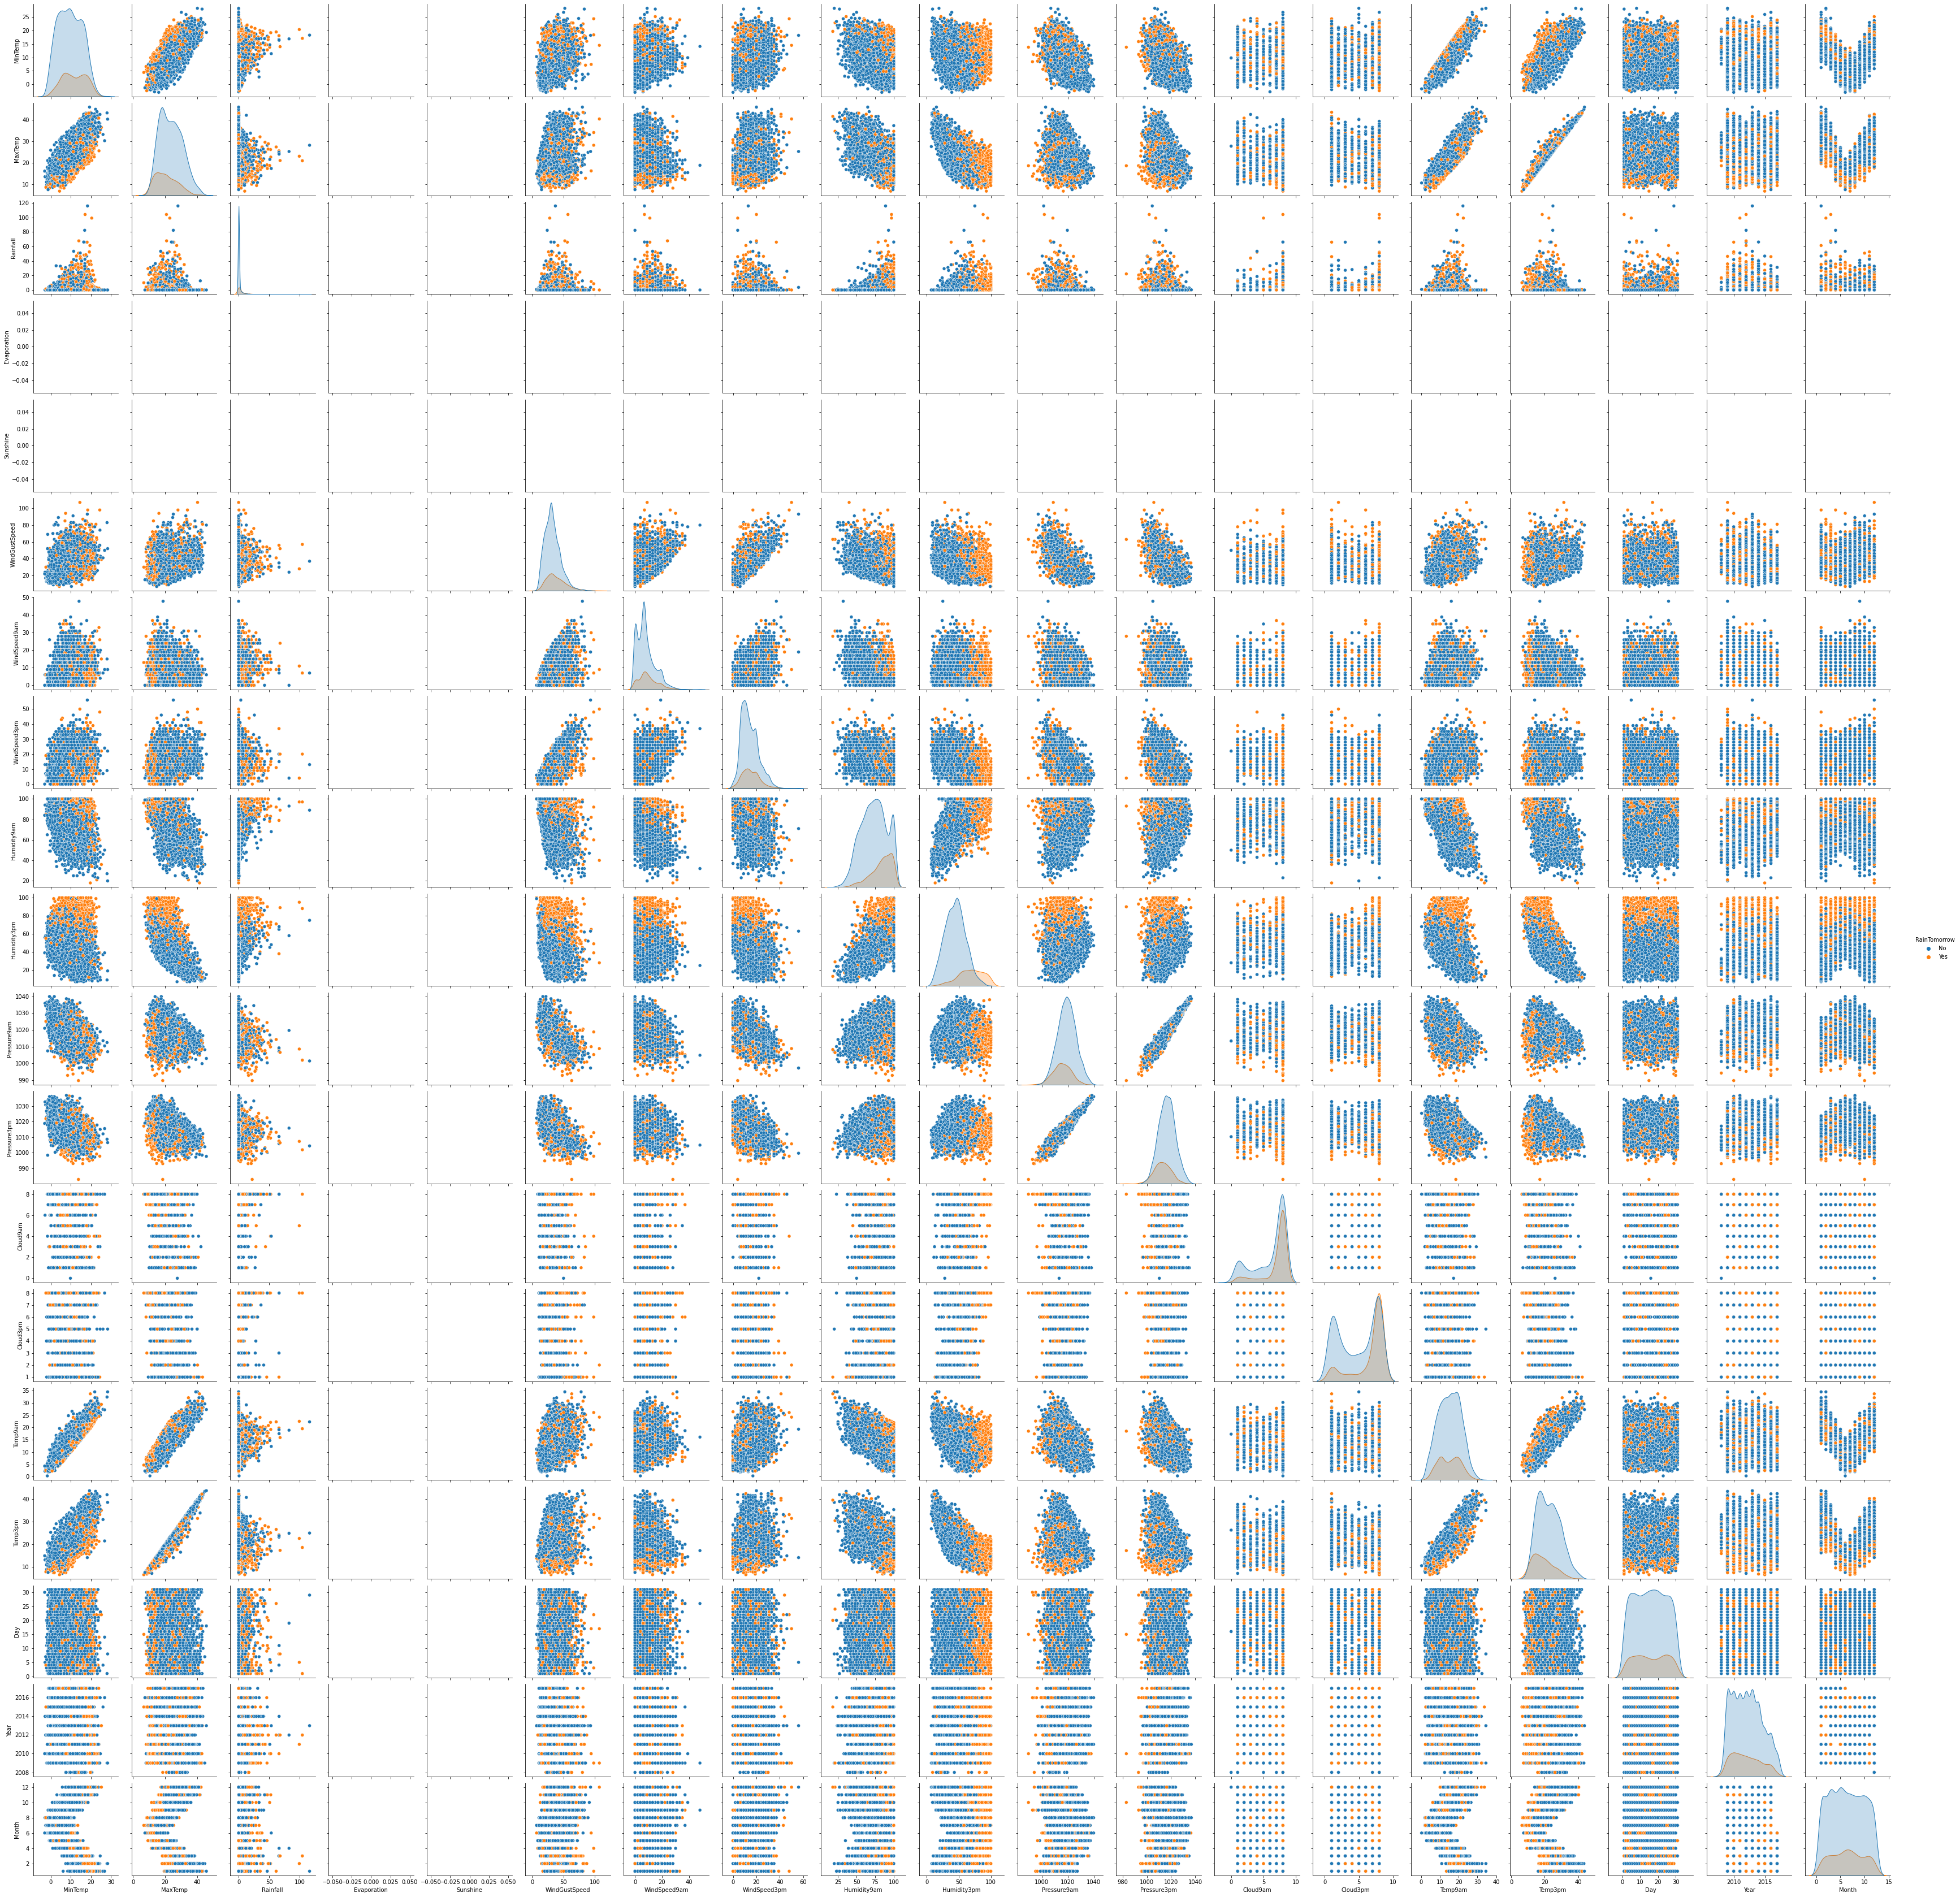

In [89]:
sns.pairplot(df.head(5000), hue='RainTomorrow')

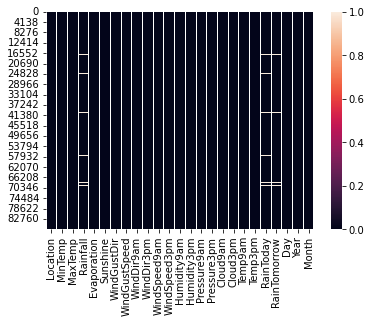

In [132]:
sns.heatmap(df.isnull())

In [134]:
df['WindSpeed9am'].fillna(df['WindSpeed9am'].mean(),inplace=True)
df['WindSpeed3pm'].fillna(df['WindSpeed3pm'].mean(),inplace=True)
df['Humidity9am'].fillna(df['Humidity9am'].mean(),inplace=True)
df['Humidity3pm'].fillna(df['Humidity3pm'].mean(),inplace=True)
df['Pressure9am'].fillna(df['Pressure9am'].mean(),inplace=True)
df['Pressure3pm'].fillna(df['Pressure3pm'].mean(),inplace=True)
df['Cloud9am'].fillna(df['Cloud9am'].mean(),inplace=True)
df['Cloud3pm'].fillna(df['Cloud3pm'].mean(),inplace=True)
df['Temp9am'].fillna(df['Temp9am'].mean(),inplace=True)
df['Temp3pm'].fillna(df['Temp3pm'].mean(),inplace=True)
df['WindGustSpeed'].fillna(df['WindGustSpeed'].mean(),inplace=True)
df['MinTemp'].fillna(df['MinTemp'].mean(),inplace=True)
df['MaxTemp'].fillna(df['MaxTemp'].mean(),inplace=True)
df['Evaporation'].fillna(df['Evaporation'].mean(),inplace=True)
df['Sunshine'].fillna(df['Sunshine'].mean(),inplace=True)
df['Rainfall'].fillna(df['Sunshine'].mean(),inplace=True)

In [128]:
(df.groupby('WindDir3pm').Year.count().sort_values().reset_index(),
df.groupby('WindDir9am').Year.count().sort_values().reset_index(),
df.groupby('WindGustDir').Year.count().sort_values().reset_index())

(   WindDir3pm  Year
 0         NNW  4144
 1         ENE  4321
 2         NNE  4334
 3         ESE  4341
 4          NW  4946
 5          SW  4999
 6         SSW  5024
 7           E  5048
 8         SSE  5206
 9         WSW  5314
 10        WNW  5625
 11         NE  5738
 12         SE  5808
 13          N  5840
 14          W  6571
 15          S  6648,    WindDir9am  Year
 0         ESE  3295
 1         ENE  3947
 2         NNW  4049
 3          NE  4083
 4           E  4281
 5         SSE  4385
 6          SE  4411
 7         NNE  4865
 8           S  4893
 9         WSW  5052
 10        SSW  5158
 11        WNW  5200
 12         NW  5418
 13         SW  6203
 14          W  6243
 15          N  7609,    WindGustDir  Year
 0          NNW  3237
 1          ESE  3596
 2          NNE  4378
 3           SE  4391
 4           NW  4449
 5           NE  4524
 6          ENE  4627
 7            E  4874
 8          SSE  5091
 9           SW  5320
 10         WNW  5431
 11         SSW  5454


In [129]:
df['WindGustDir'].fillna('E',inplace=True)
df['WindDir9am'].fillna('NNE',inplace=True)
df['WindDir3pm'].fillna('E',inplace=True)

In [135]:
df['RainToday'].fillna('No',inplace=True)
df['RainTomorrow'].fillna('No',inplace=True)

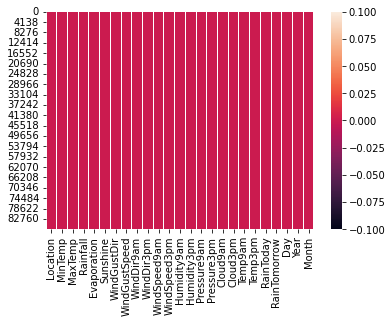

In [136]:
sns.heatmap(df.isnull())

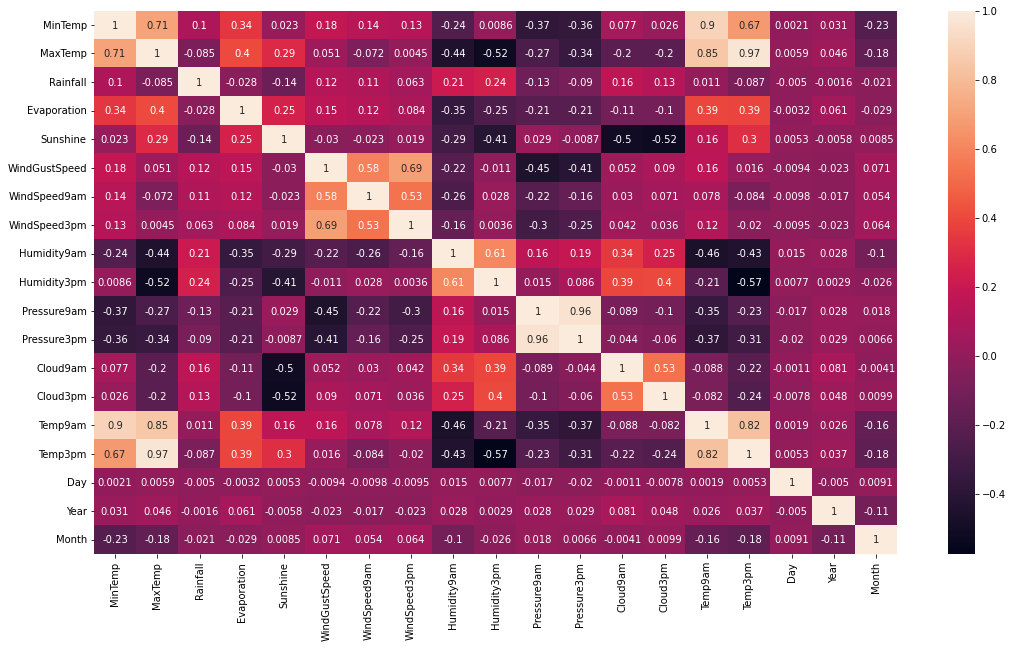

In [138]:
plt.figure(figsize=(18,10))
sns.heatmap(df[num_col].corr(),annot=True)